In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/advertising/advertising.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
data=pd.read_csv("../input/advertising/advertising.csv")

In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
data.shape

(1000, 10)

In [6]:
data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


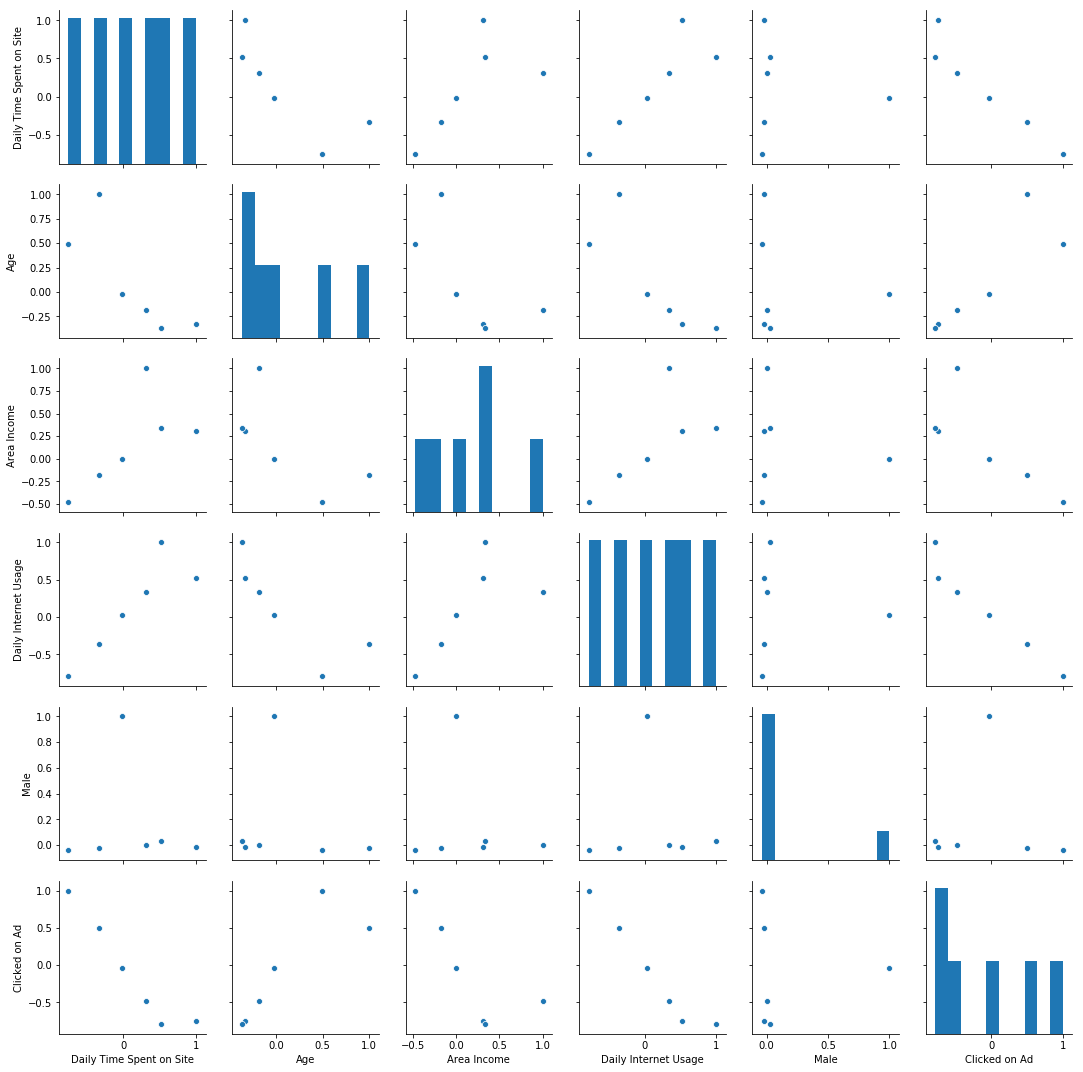

In [7]:
sns.pairplot(data.corr())

In [8]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


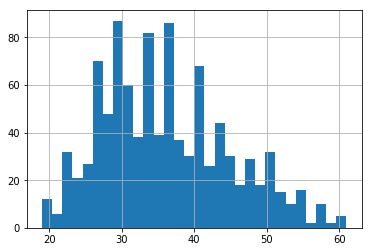

In [11]:
data["Age"].hist(bins=30)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


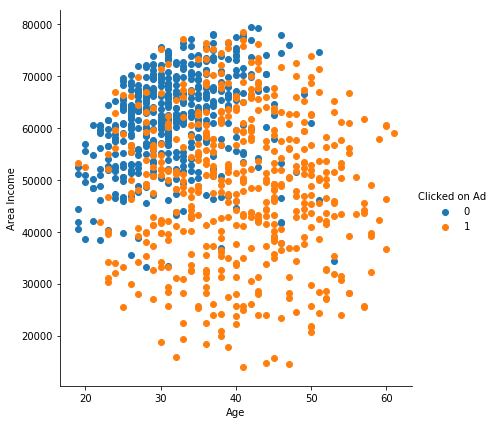

In [12]:
sns.FacetGrid(data, hue="Clicked on Ad", size=6) \
   .map(plt.scatter, "Age", "Area Income") \
   .add_legend()

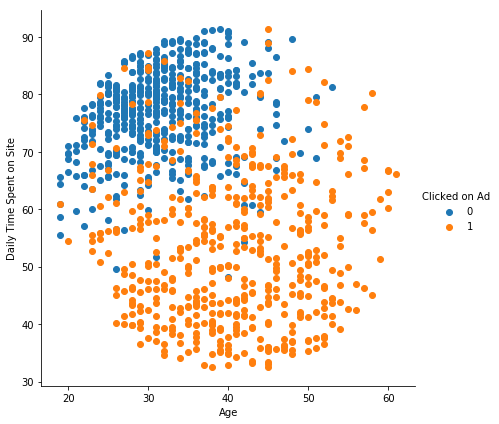

In [13]:
sns.FacetGrid(data, hue="Clicked on Ad", size=6) \
   .map(plt.scatter, "Age", "Daily Time Spent on Site") \
   .add_legend()

People who spent more time on site clicked ads

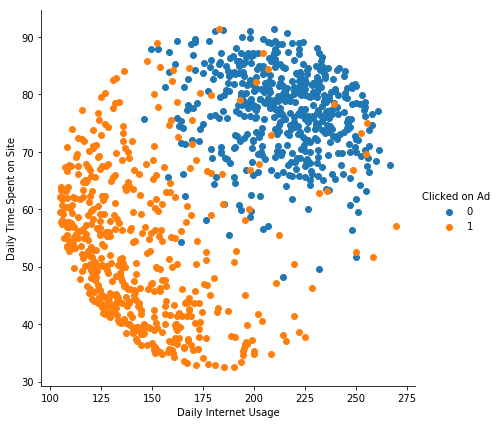

In [14]:
sns.FacetGrid(data, hue="Clicked on Ad", size=6) \
   .map(plt.scatter, "Daily Internet Usage", "Daily Time Spent on Site") \
   .add_legend()

People with less Daily Internet Usage has more clicked ads

In [15]:
#Splitting Data
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [16]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = logmodel.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('LogR Model Accuracy : ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.92      0.88      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

[[92  8]
 [12 88]]
LogR Model Accuracy :  0.9


In [19]:
rf = RandomForestClassifier(criterion='gini', n_estimators=400,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)
rf.fit(X_train,y_train)
# Predict using model
rf_training_pred = rf.predict(X_train)
rf_training_prediction = accuracy_score(y_train, rf_training_pred)

In [20]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Random Forest Accuracy : ",rf_training_prediction)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.92      0.88      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

[[92  8]
 [12 88]]
Random Forest Accuracy :  0.98375


In [21]:
#Comparing:
print('LogR Model Accuracy : ',accuracy_score(y_pred,y_test))
print("Random Forest Accuracy : ",rf_training_prediction)

LogR Model Accuracy :  0.9
Random Forest Accuracy :  0.98375
